Module 3, Session 2- Practical Exercises
Objective: To practice the core techniques of Exploratory Data Analysis (EDA) on the Titanic dataset.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

Exercise 1:
The Initial Investigation

Display the first 5 rows, get column info, and statistical summary.

In [10]:
print(df.head())
print(df.info())
print(df.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Initial Observations / Questions:
- There are missing values in the 'Age' column.
- What does the 'Parch' column represent?
- Most passengers are in 3rd class.

Exercise 2:
Univariate Analysis

Analyze 'Age', 'Sex', and 'Pclass' separately.

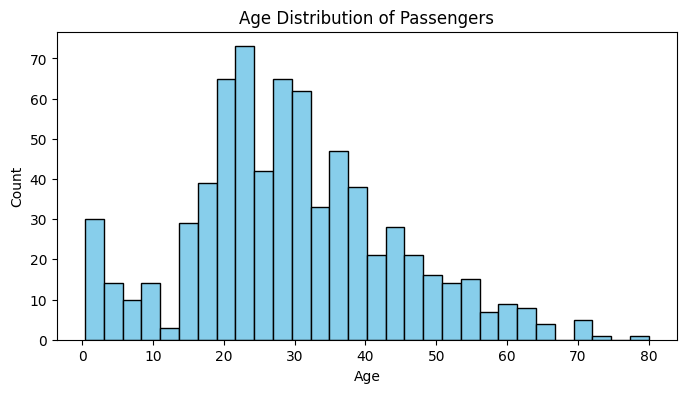

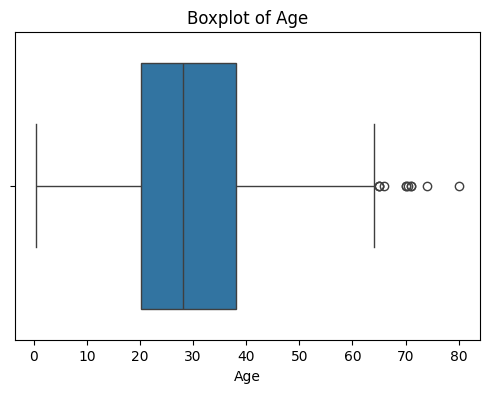

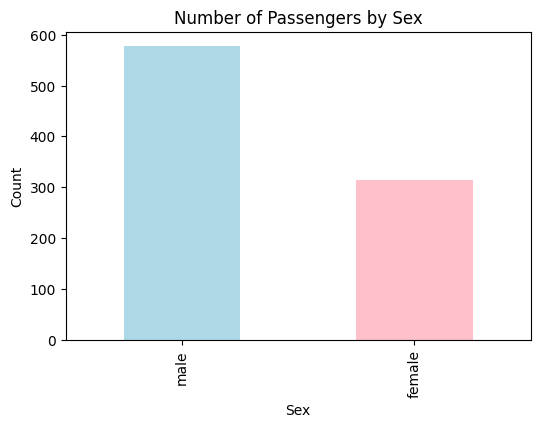

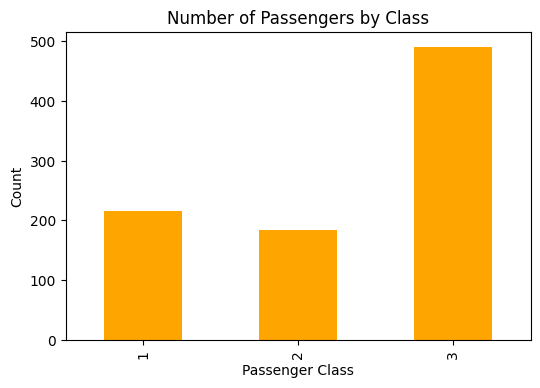

In [11]:
plt.figure(figsize=(8,4))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

plt.figure(figsize=(6,4))
df['Sex'].value_counts().plot(kind='bar', color=['lightblue','pink'])
plt.title('Number of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
df['Pclass'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Number of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Exercise 3:
Bivariate Analysis

Explore relationships between variables.

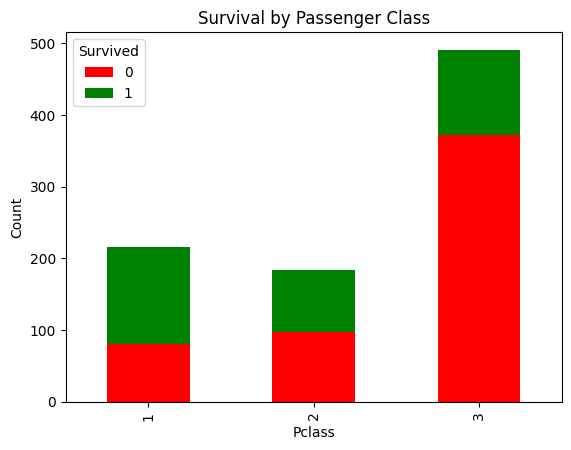

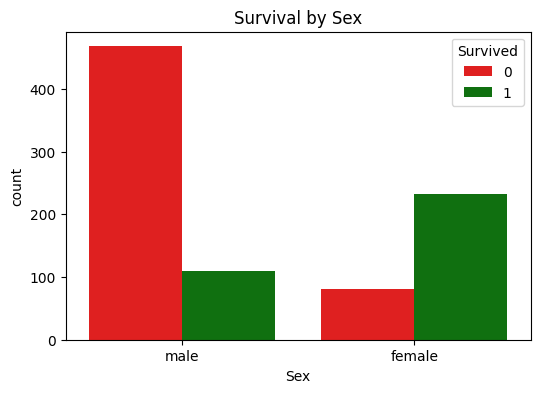

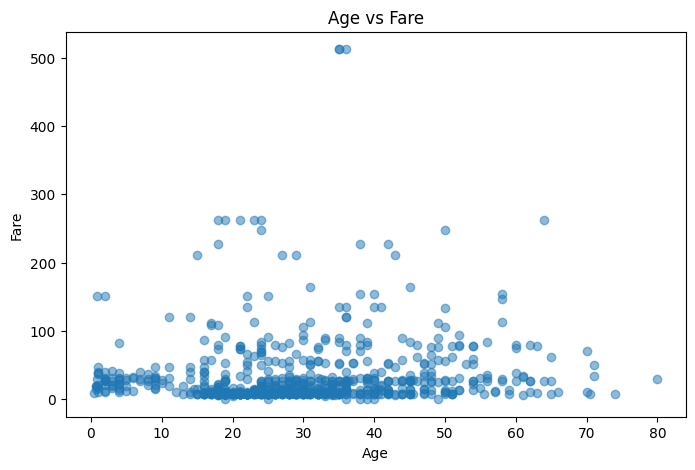

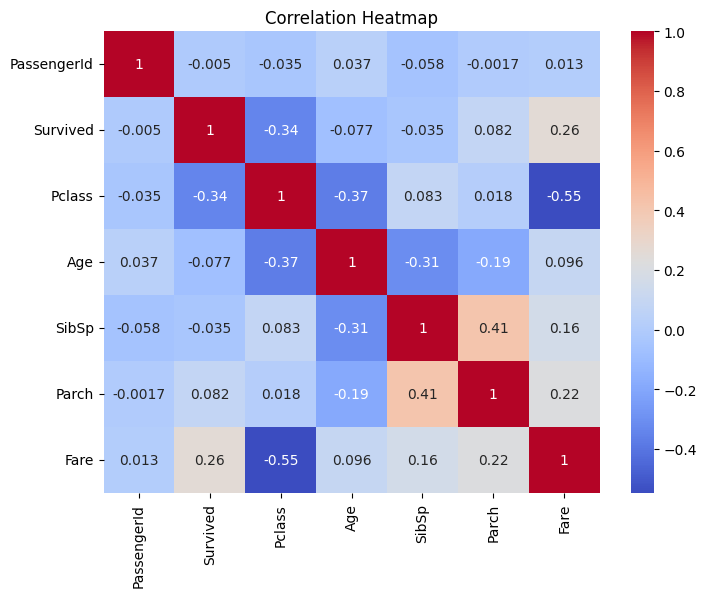

In [13]:
ct = pd.crosstab(df['Pclass'], df['Survived'])
ct.plot(kind='bar', stacked=True, color=['red','green'])
plt.title('Survival by Passenger Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df, palette=['red','green'])
plt.title('Survival by Sex')
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Fare'], alpha=0.5)
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations from Heatmap
- Strongest positive correlation: SibSp and FamilySize (if calculated) or Fare with Pclass (negative correlation).
- Strongest negative correlation: Age and Pclass (older passengers tend to be in higher classes?).